In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gi
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

## 1 hidden layer sigmoid - sigmoid output

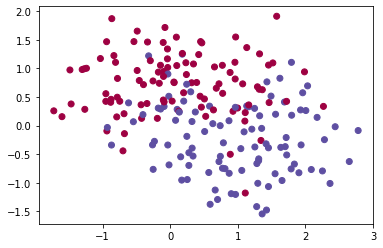

In [ ]:
# Generate dataset
np.random.seed(3)
X, y = sklearn.datasets.make_moons(200, True, noise=0.5)
y = y.reshape(200, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [ ]:
num_examples = len(X)
nn_input_dim = X.shape[1]
nn_hdim = 5
nn_output_dim = 1
lr = 0.01

def calculate_loss(A2, y):
  loss = (-1/num_examples) * np.sum(y * np.log(A2) + (1-y) * np.log(1-A2))
  return loss

def predict_sigmoid(model, X):
  W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
  Z1 = np.dot(X, W1) + b1
  A1 = 1/(1 + np.exp(-Z1))
  Z2 = np.dot(A1, W2) + b2
  A2 = 1/(1 + np.exp(-Z2))
  return np.where(A2 >=0.5, 1, 0)

def build_model(X, y, nn_hdim, num_passes=1000, print_loss=False):
  np.random.seed(3)
  # Initialize W, b
  W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
  b1 = np.zeros((1, nn_hdim))
  W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
  b2 = np.zeros((1, nn_output_dim))
  loss_history = []

  model = {}
  for i in range(num_passes):
    #forward
    Z1 = np.dot(X, W1) + b1
    A1 = 1/(1 + np.exp(-Z1))
    Z2 = np.dot(A1, W2) + b2
    A2 = 1/(1 + np.exp(-Z2))
    loss = calculate_loss(A2, y)
    loss_history.append(loss)

    #backprob
    dZ2 = (A2 - y) / num_examples
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * A1 * (1-A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    model = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}

    if print_loss and i % 100 == 0:
      print('Loss after iterration ' + str(i) + ' is: ' + str(loss))

  return model, loss_history

In [ ]:
model, loss_history = build_model(X, y, nn_hdim, num_passes=1000, print_loss=True)

Loss after iterration 0 is: 0.7710803441541509
Loss after iterration 100 is: 0.39230547267510374
Loss after iterration 200 is: 0.39146976584468124
Loss after iterration 300 is: 0.3911086964179606
Loss after iterration 400 is: 0.3907400712317704
Loss after iterration 500 is: 0.39041072288241124
Loss after iterration 600 is: 0.39003278773076183
Loss after iterration 700 is: 0.38939106698300313
Loss after iterration 800 is: 0.38795944972649327
Loss after iterration 900 is: 0.3845855672846081


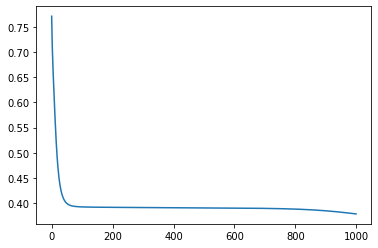

In [ ]:
plt.plot(np.arange(1000), loss_history)

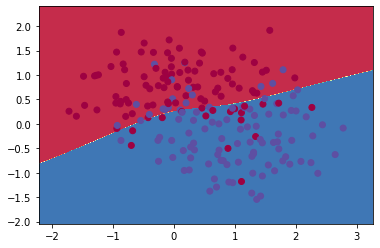

In [ ]:
plot_decision_boundary(lambda X: predict_sigmoid(model, X))

## 2 hidden layer relu - sigmoid ouput

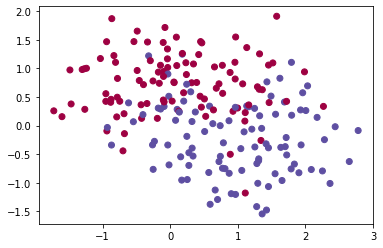

In [ ]:
# Generate dataset
np.random.seed(3)
X, y = sklearn.datasets.make_moons(200, True, noise=0.5)
y = y.reshape(200, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [ ]:
num_examples = len(X)
nn_input_dim = X.shape[1]
nn_hdim_1 = 5
nn_hdim_2 = 4
nn_output_dim = 1
lr = 0.01


def calculate_loss(A3, y):
  loss = (-1/num_examples) * np.sum(y * np.log(A3) + (1-y) * np.log(1-A3))
  return loss


def predict_relu2(model, X):
  W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3']
  Z1 = np.dot(X, W1) + b1
  A1 = np.maximum(Z1, 0)
  Z2 = np.dot(A1, W2) + b2
  A2 = np.maximum(Z2, 0)
  Z3 = np.dot(A2, W3) + b3
  A3 = 1/(1 + np.exp(-Z3))
  return np.where(A3 >=0.5, 1, 0)
  

def build_model_relu2(X, y, nn_hdim_1, nn_hdim_2, num_passes=1000, print_loss=False):
  np.random.seed(3)
  W1 = np.random.randn(nn_input_dim, nn_hdim_1) / np.sqrt(nn_input_dim)
  b1 = np.zeros((1, nn_hdim_1))
  W2 = np.random.randn(nn_hdim_1, nn_hdim_2) / np.sqrt(nn_hdim_1)
  b2 = np.zeros((1, nn_hdim_2))
  W3 = np.random.randn(nn_hdim_2, nn_output_dim) / np.sqrt(nn_hdim_2)
  b3 = np.zeros((1, nn_output_dim))
  loss_history = []


  model = {}
  for i in range(num_passes):
    # forward
    Z1 = np.dot(X, W1) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(A1, W2) + b2
    A2 = np.maximum(Z2, 0)
    Z3 = np.dot(A2, W3) + b3
    A3 = 1/(1 + np.exp(-Z3))
    loss = calculate_loss(A3, y)
    loss_history.append(loss)

    # backward
    dZ3 = (A3 - y)/num_examples
    dW3 = np.dot(A2.T, dZ3)
    db3 = np.sum(dZ3, axis=0, keepdims=True)

    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * np.where(Z2>0, 1, 0)
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * np.where(Z1>0, 1, 0)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    W3 -= lr * dW3
    b3 -= lr * db3

    model = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2, 'W3':W3, 'b3':b3}

    if print_loss and i % 100 == 0:
      print('Loss after iterration ' + str(i) + ' is: ' + str(loss))

  return model, loss_history

In [ ]:
model, loss_history = build_model_relu2(X, y, nn_hdim_1, nn_hdim_2, num_passes=1000, print_loss=True)

Loss after iterration 0 is: 0.7432920278918433
Loss after iterration 100 is: 0.39802253664835385
Loss after iterration 200 is: 0.3867092632909181
Loss after iterration 300 is: 0.38998094324037824
Loss after iterration 400 is: 0.37853693726670706
Loss after iterration 500 is: 0.37829157254188356
Loss after iterration 600 is: 0.3796950397893805
Loss after iterration 700 is: 0.37411575540148534
Loss after iterration 800 is: 0.3753733546700252
Loss after iterration 900 is: 0.37629278732960814


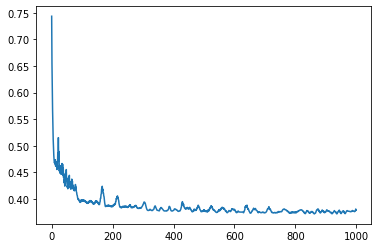

In [ ]:
plt.plot(np.arange(1000), loss_history)

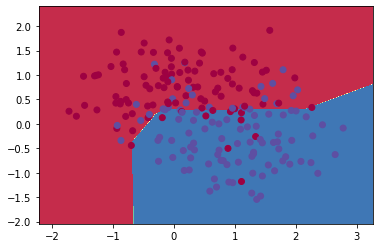

In [ ]:
plot_decision_boundary(lambda X: predict_relu2(model, X))

## 1 hidden layer tanh, softmax output, 3 classes

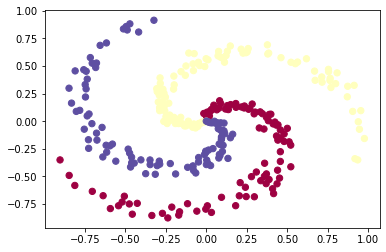

In [ ]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K, D)) # data matrix, one row is one example
Y = np.zeros(N*K, dtype = 'uint8') # calss label

for i in range(K):
  ix = range(N*i, N*(i+1))
  r = np.linspace(0.0, 1, N) # radius
  t = np.linspace(i*4, (i+1)*4, N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  Y[ix] = i
plt.scatter(X[:,0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
y = np.array(pd.get_dummies(Y))

In [ ]:
nn_hdim = 20
lr = 0.1
reg_lambda = 0.001
num_examples = N*K

def calculate_loss_tanh_softmax3(model, y):
  W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
  Z1 = np.dot(X, W1) + b1
  A1 = np.tanh(Z1)
  Z2 = np.dot(A1, W2) + b2
  yhat = np.exp(Z2)/np.sum(np.exp(Z2), axis=1, keepdims=True)
  loss = (-1/num_examples) * np.sum(y * np.log(yhat))
  reg_loss = loss + 0.5 * reg_lambda * (np.sum(W1 * W1) + np.sum(W2 * W2))
  return reg_loss


def predict_tanh_softmax3(model, X):
  W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
  Z1 = np.dot(X, W1) + b1
  A1 = np.tanh(Z1)
  Z2 = np.dot(A1, W2) + b2
  yhat = np.exp(Z2)/np.sum(np.exp(Z2), axis=1, keepdims=True)
  return np.argmax(yhat, axis=1)
  

def build_model_tanh_softmax3(X, y, nn_hdim, num_passes, print_loss=False):
  np.random.seed(3)
  W1 = np.random.randn(D, nn_hdim) / np.sqrt(D)
  b1 = np.zeros((1, nn_hdim))
  W2 = np.random.randn(nn_hdim, K) / np.sqrt(nn_hdim)
  b2 = np.zeros((1, K))
  loss_history = []


  model = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}
  for i in range(num_passes):
    # forward
    Z1 = np.dot(X, W1) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1, W2) + b2
    yhat = np.exp(Z2)/np.sum(np.exp(Z2), axis=1, keepdims=True)
    loss = calculate_loss_tanh_softmax3(model, y)
    loss_history.append(loss)

    # backward
    dZ2 = (yhat - y) / num_examples
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (1 - A1 * A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # add regularization terms 
    dW1 += reg_lambda * W1
    dW2 += reg_lambda * W2
    
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    model = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}

    if print_loss and i % 100 == 0:
      print('Loss after iterration ' + str(i) + ' is: ' + str(loss))

  return model, loss_history

In [ ]:
model, loss_history = build_model_tanh_softmax3(X, y, nn_hdim, num_passes=1000, print_loss=True)

Loss after iterration 0 is: 1.0531024903956345
Loss after iterration 100 is: 0.7848907377447394
Loss after iterration 200 is: 0.7746851740708177
Loss after iterration 300 is: 0.767147755628069
Loss after iterration 400 is: 0.7596795540712733
Loss after iterration 500 is: 0.751654685186986
Loss after iterration 600 is: 0.7423845966317477
Loss after iterration 700 is: 0.7310647130086201
Loss after iterration 800 is: 0.7167905091727899
Loss after iterration 900 is: 0.6986424899676911


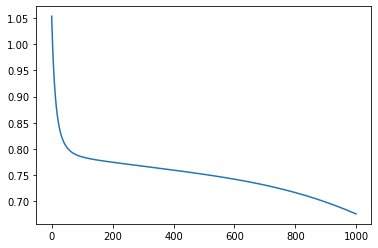

In [ ]:
plt.plot(np.arange(1000), loss_history)

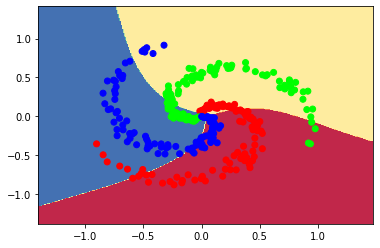

In [ ]:
plot_decision_boundary(lambda X: predict_tanh_softmax3(model, X))